<a href="https://colab.research.google.com/github/Dazzyayan/mlds-research-project/blob/main/ts2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: mount google drive mlds_research_project folder

from google.colab import drive
drive.mount('/content/drive')

# Navigate to the desired folder (replace 'mlds_research_project' with your actual folder name)
import os
os.chdir('/content/drive/MyDrive/mlds_research_project/ts2vec')

Mounted at /content/drive


In [2]:
# prompt: add all python modules at /content/drive/MyDrive/mlds_research_project/ts2vec to the path or import them into the notebook

import sys

# Add the specific directory to the Python path
sys.path.append('/content/drive/MyDrive/mlds_research_project/ts2vec')

# Now you can import modules from that directory
# For example, if you have a file named my_module.py in ts2vec:
# import my_module

In [3]:
from ts2vec import TS2Vec
import datautils
import torch
print(torch.cuda.is_available())

True


In [8]:
train_data, train_labels, test_data, test_labels = datautils.load_UCR('ECG200')
# (Both train_data and test_data have a shape of n_instances x n_timestamps x n_features)


# Train a TS2Vec model
model = TS2Vec(
    input_dims=1,
    device=0,
    output_dims=320
)
loss_log = model.fit(
    train_data,
    verbose=True
)

# # Compute timestamp-level representations for test set
# test_repr = model.encode(test_data)  # n_instances x n_timestamps x output_dims

# # Compute instance-level representations for test set
# test_repr = model.encode(test_data, encoding_window='full_series')  # n_instances x output_dims

# Sliding inference for test set
test_repr = model.encode(
    test_data,
    causal=True,
    sliding_length=1,
    sliding_padding=6
)  # n_instances x n_timestamps x output_dims
# (The timestamp t's representation vector is computed using the observations located in [t-50, t])


Epoch #0: loss=8.410502513249716
Epoch #1: loss=3.100027402242025
Epoch #2: loss=2.883192698160807
Epoch #3: loss=2.702761729558309
Epoch #4: loss=2.5906828244527182
Epoch #5: loss=2.591712236404419
Epoch #6: loss=2.572487155596415
Epoch #7: loss=2.341935118039449
Epoch #8: loss=2.434739271799723
Epoch #9: loss=2.362333099047343
Epoch #10: loss=2.2832690874735513
Epoch #11: loss=2.1695255438486734
Epoch #12: loss=2.1407461961110434
Epoch #13: loss=2.1759697596232095
Epoch #14: loss=2.143120368321737
Epoch #15: loss=2.1963768005371094
Epoch #16: loss=2.22537891070048
Epoch #17: loss=2.018323997656504
Epoch #18: loss=1.884354293346405
Epoch #19: loss=2.2101901173591614
Epoch #20: loss=2.167458156744639
Epoch #21: loss=2.0440369248390198
Epoch #22: loss=2.087634344895681
Epoch #23: loss=2.0669544339179993
Epoch #24: loss=2.1306250294049582
Epoch #25: loss=1.9185733199119568
Epoch #26: loss=1.9924980600674946
Epoch #27: loss=2.0879878997802734
Epoch #28: loss=1.91459721326828
Epoch #29: lo

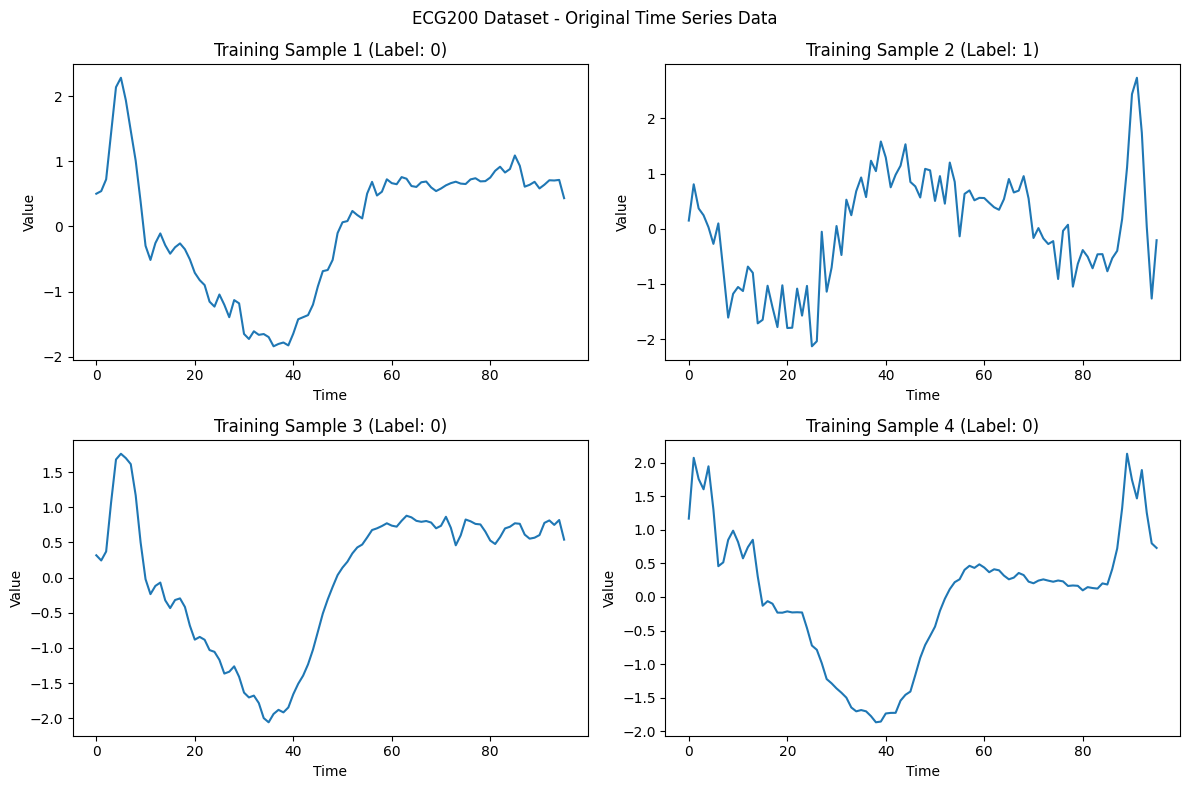

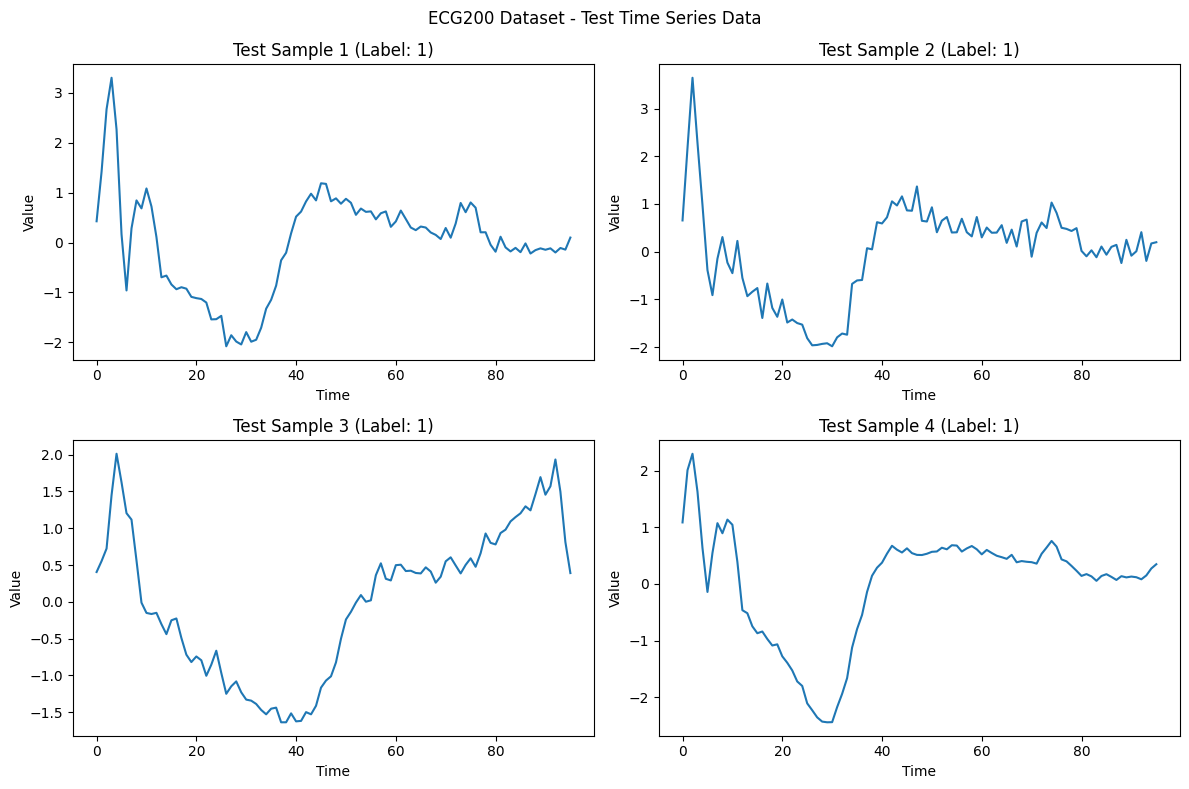

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Plot a few examples from the training data
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('ECG200 Dataset - Original Time Series Data')

for i in range(4):
    row = i // 2
    col = i % 2
    axes[row, col].plot(train_data[i, :, 0])
    axes[row, col].set_title(f'Training Sample {i+1} (Label: {train_labels[i]})')
    axes[row, col].set_xlabel('Time')
    axes[row, col].set_ylabel('Value')

plt.tight_layout()
plt.show()

# Plot a few examples from the test data
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('ECG200 Dataset - Test Time Series Data')

for i in range(4):
    row = i // 2
    col = i % 2
    axes[row, col].plot(test_data[i, :, 0])
    axes[row, col].set_title(f'Test Sample {i+1} (Label: {test_labels[i]})')
    axes[row, col].set_xlabel('Time')
    axes[row, col].set_ylabel('Value')

plt.tight_layout()
plt.show()


Shape of test_repr: (100, 96, 320)


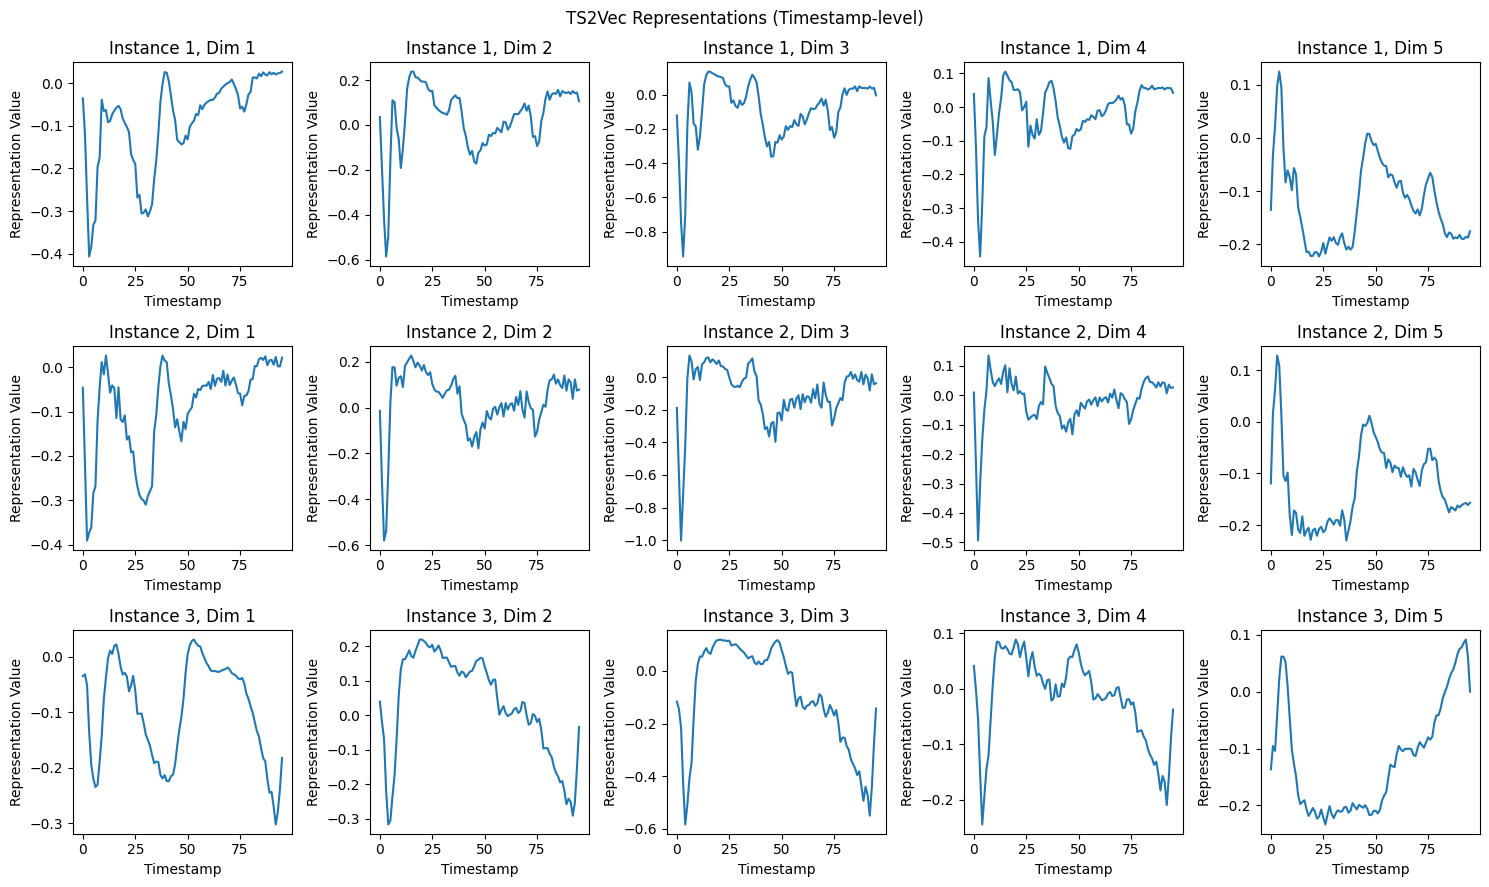

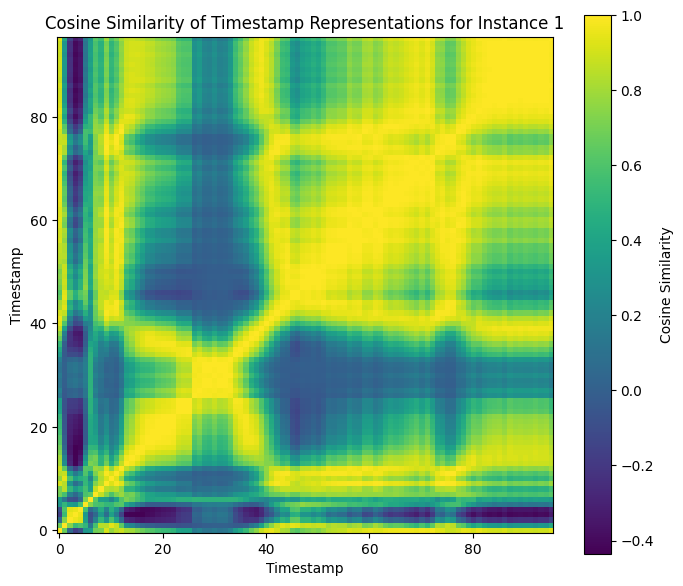

In [10]:
# Display the shape of the test_repr array
print(f'Shape of test_repr: {test_repr.shape}')

# Since test_repr is a 3D array (n_instances x n_timestamps x output_dims),
# let's visualize the representations for a few instances and their timestamps.

# Select a few instances to visualize
num_instances_to_plot = 3

# Select a few dimensions to visualize (out of the output_dims=320)
num_dimensions_to_plot = 5

fig, axes = plt.subplots(num_instances_to_plot, num_dimensions_to_plot, figsize=(15, 9))
fig.suptitle('TS2Vec Representations (Timestamp-level)')

for i in range(num_instances_to_plot):
    for j in range(num_dimensions_to_plot):
        axes[i, j].plot(test_repr[i, :, j])
        axes[i, j].set_title(f'Instance {i+1}, Dim {j+1}')
        axes[i, j].set_xlabel('Timestamp')
        axes[i, j].set_ylabel('Representation Value')

plt.tight_layout()
plt.show()

# You can also look at the relationships between different timestamps for a single instance.
# Let's visualize a heatmap of the pairwise similarity between timestamp representations for one instance.
from sklearn.metrics.pairwise import cosine_similarity

instance_to_visualize_similarity = 0  # Choose the first instance

# Compute cosine similarity matrix for the chosen instance's timestamp representations
similarity_matrix = cosine_similarity(test_repr[instance_to_visualize_similarity, :, :])

plt.figure(figsize=(8, 7))
plt.imshow(similarity_matrix, cmap='viridis', origin='lower')
plt.title(f'Cosine Similarity of Timestamp Representations for Instance {instance_to_visualize_similarity + 1}')
plt.xlabel('Timestamp')
plt.ylabel('Timestamp')
plt.colorbar(label='Cosine Similarity')
plt.show()

100: This is the number of instances or samples in your test dataset.
96: This is the number of timestamps or time steps in each instance.
320: This is the dimensionality of the representation vector for each timestamp.


In [7]:
print(f'Shape of train_data: {train_data.shape}')
print(f'Data type of train_data: {train_data.dtype}')

print(f'Shape of test_data: {test_data.shape}')
print(f'Data type of test_data: {test_data.dtype}')

Shape of train_data: (100, 96, 1)
Data type of train_data: float64
Shape of test_data: (100, 96, 1)
Data type of test_data: float64


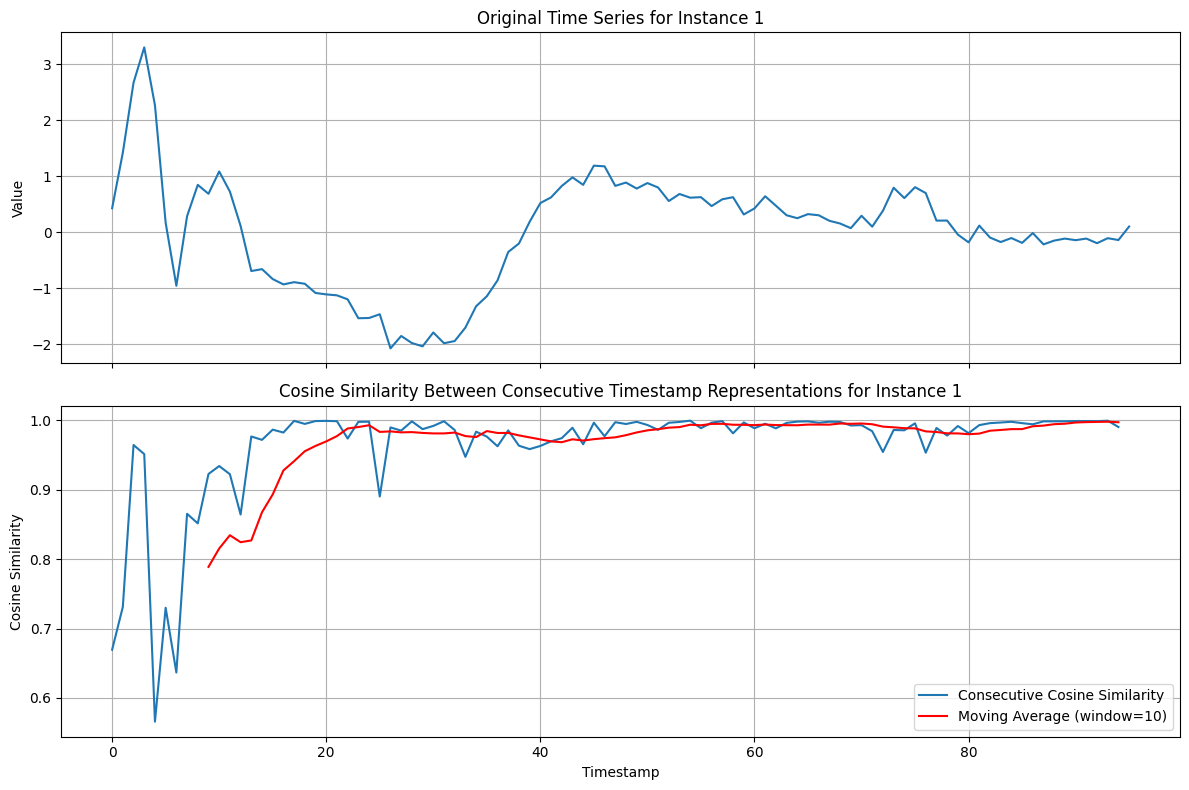

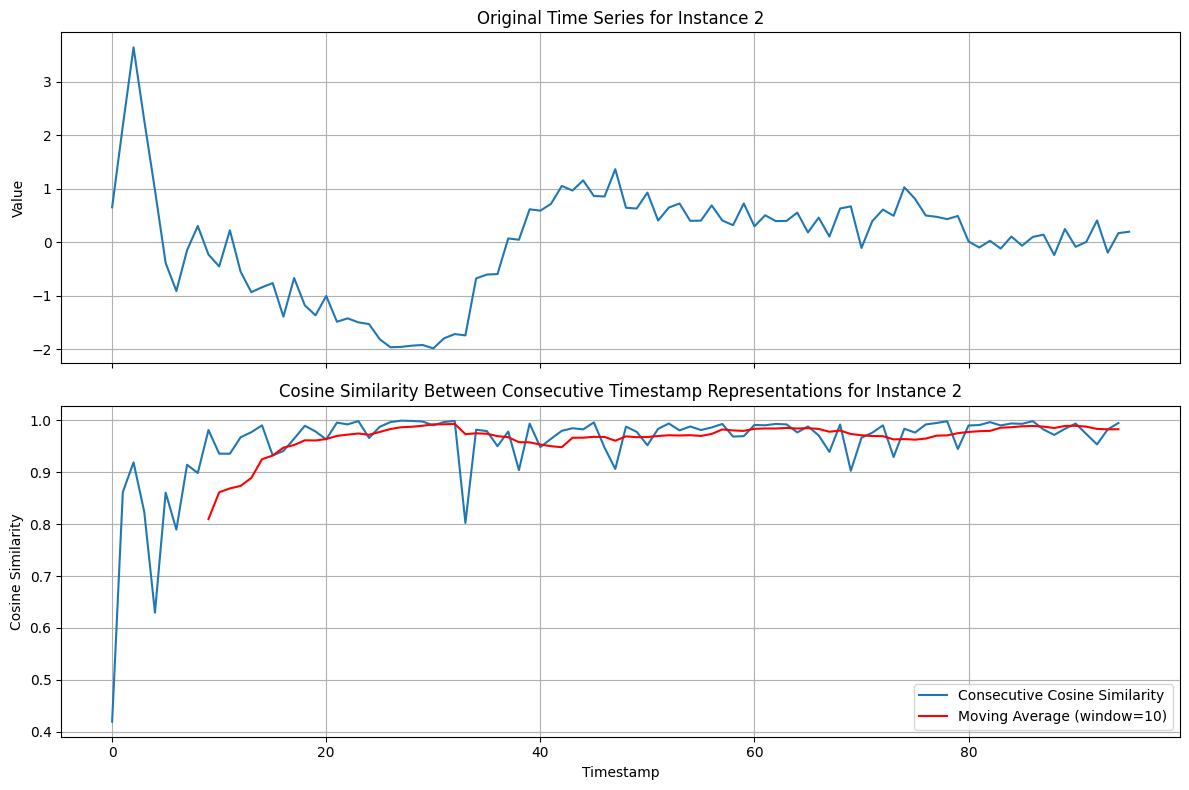

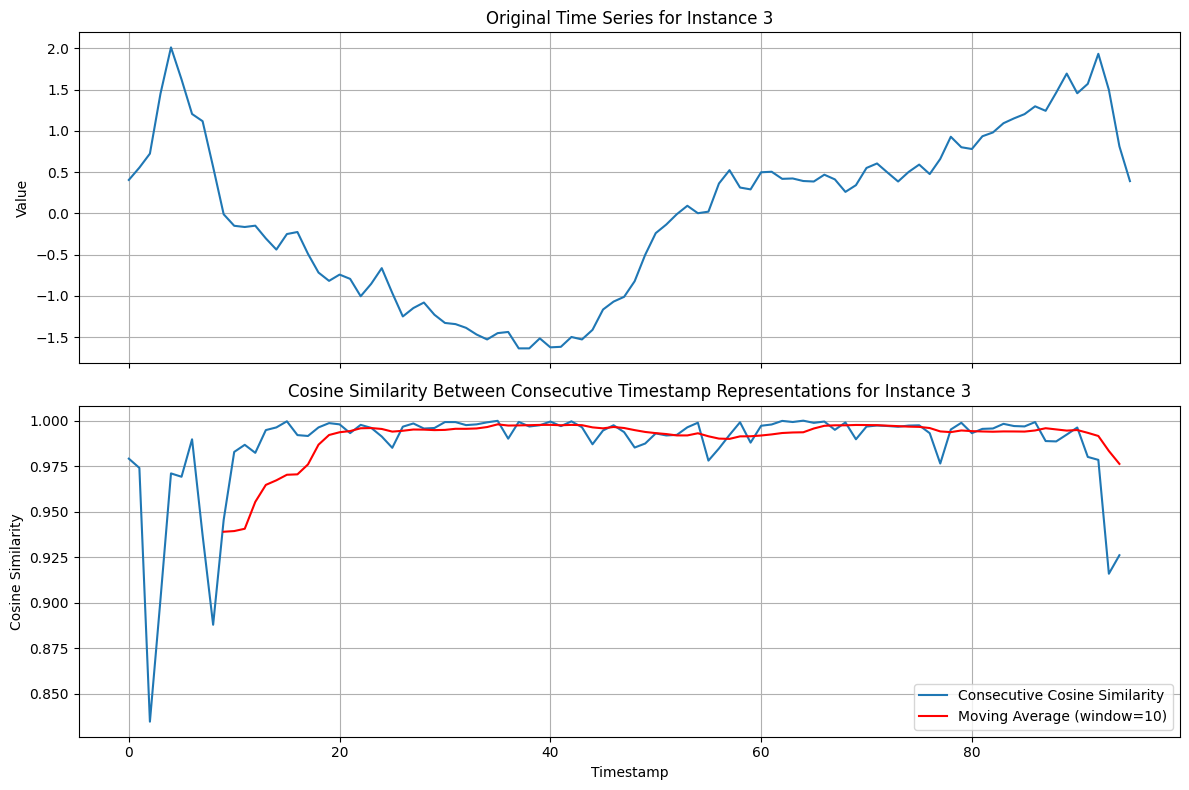

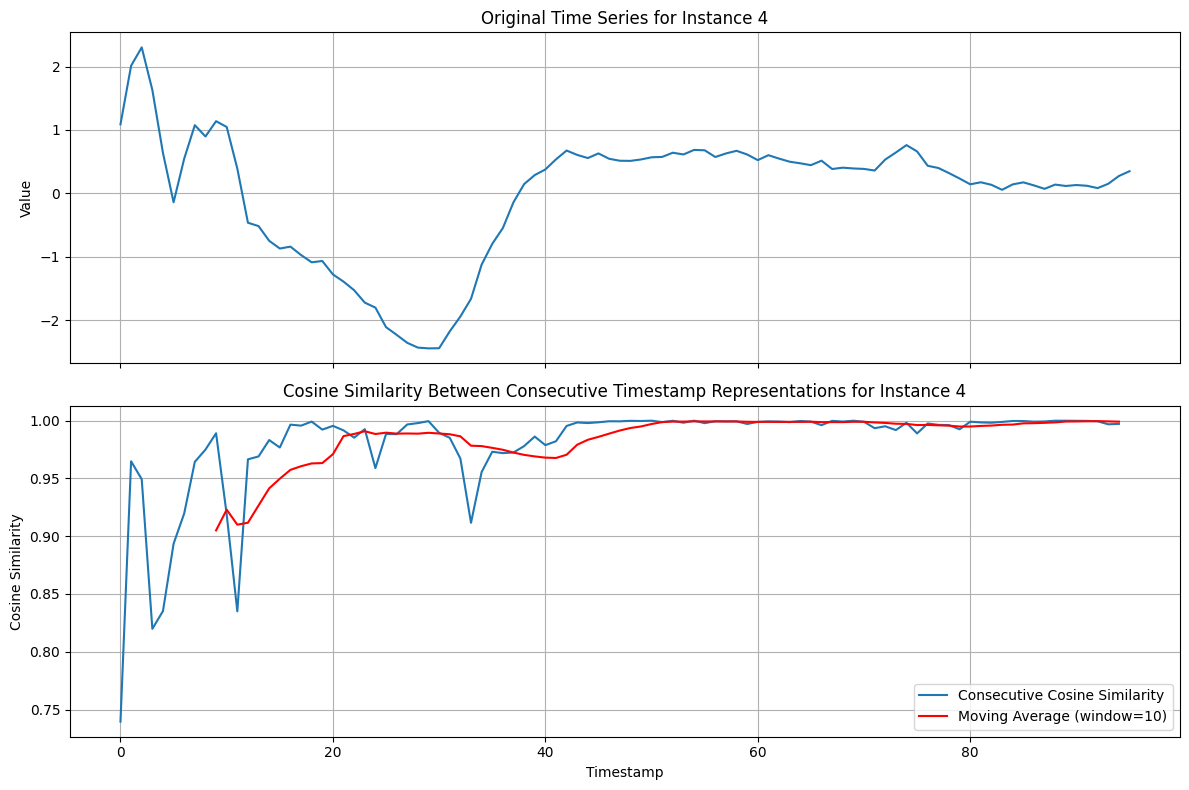

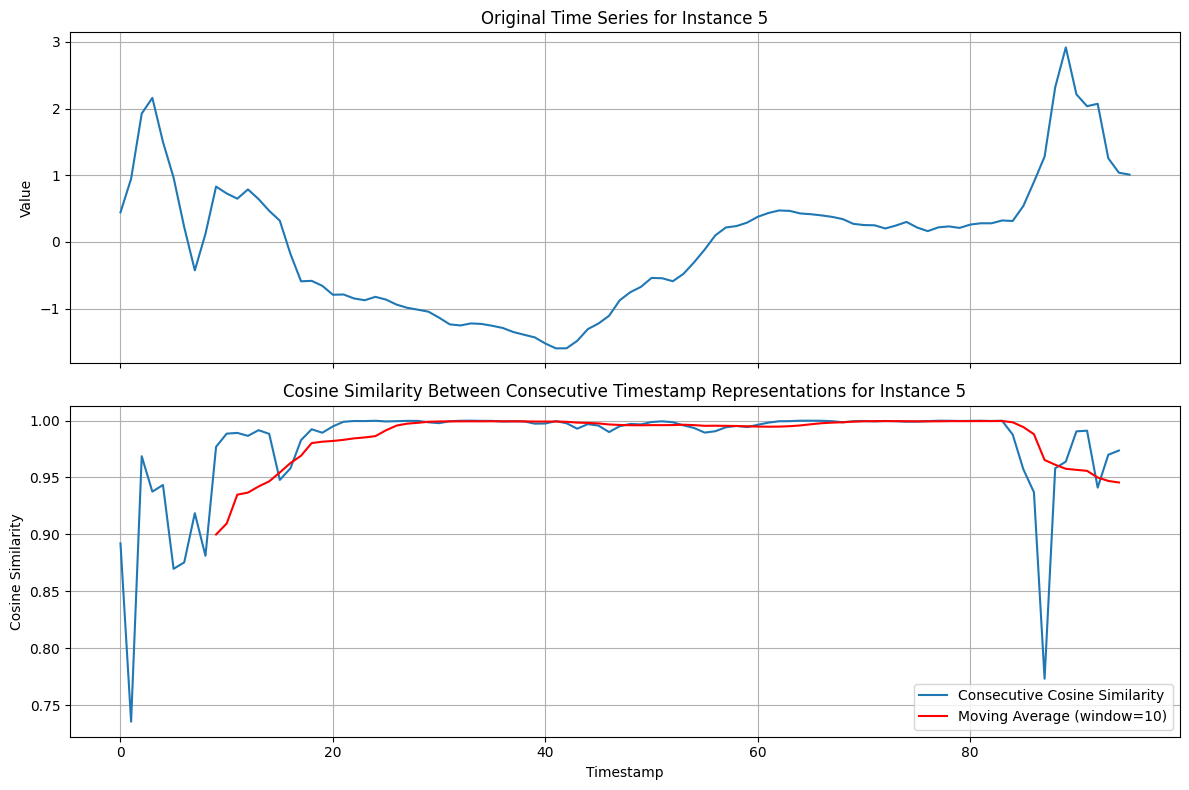

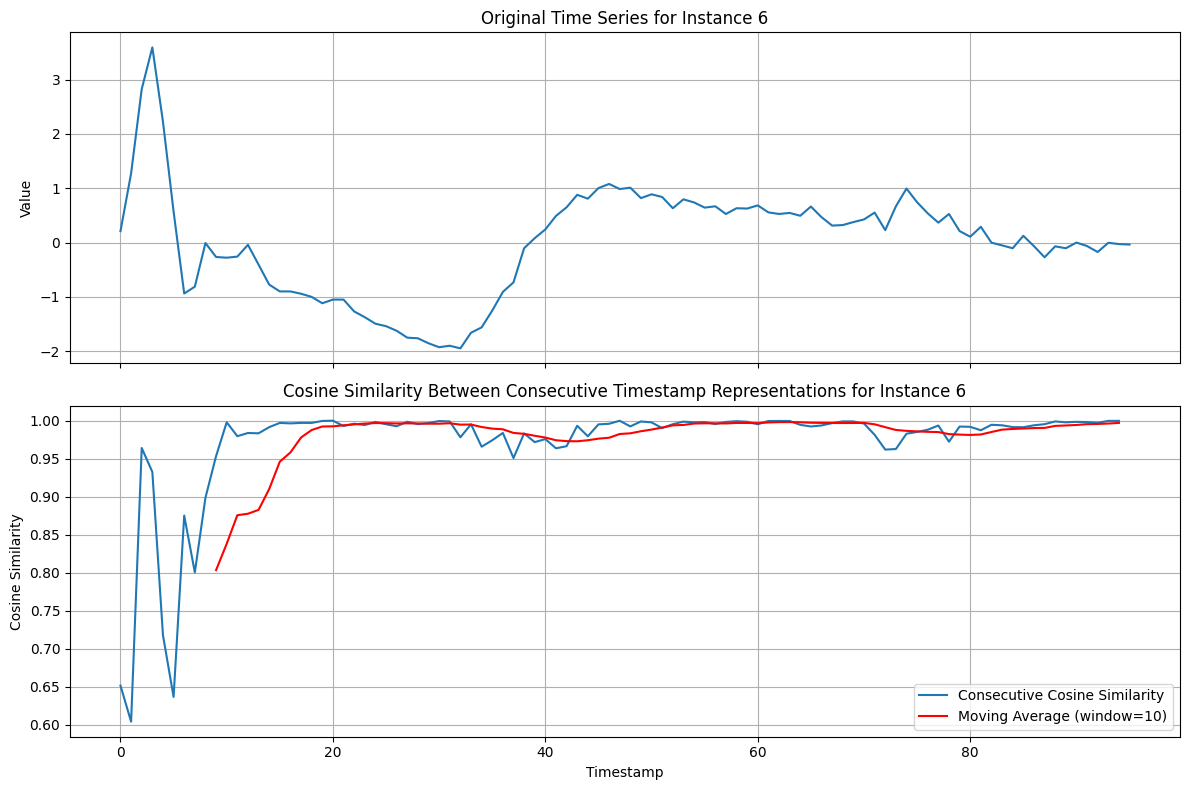

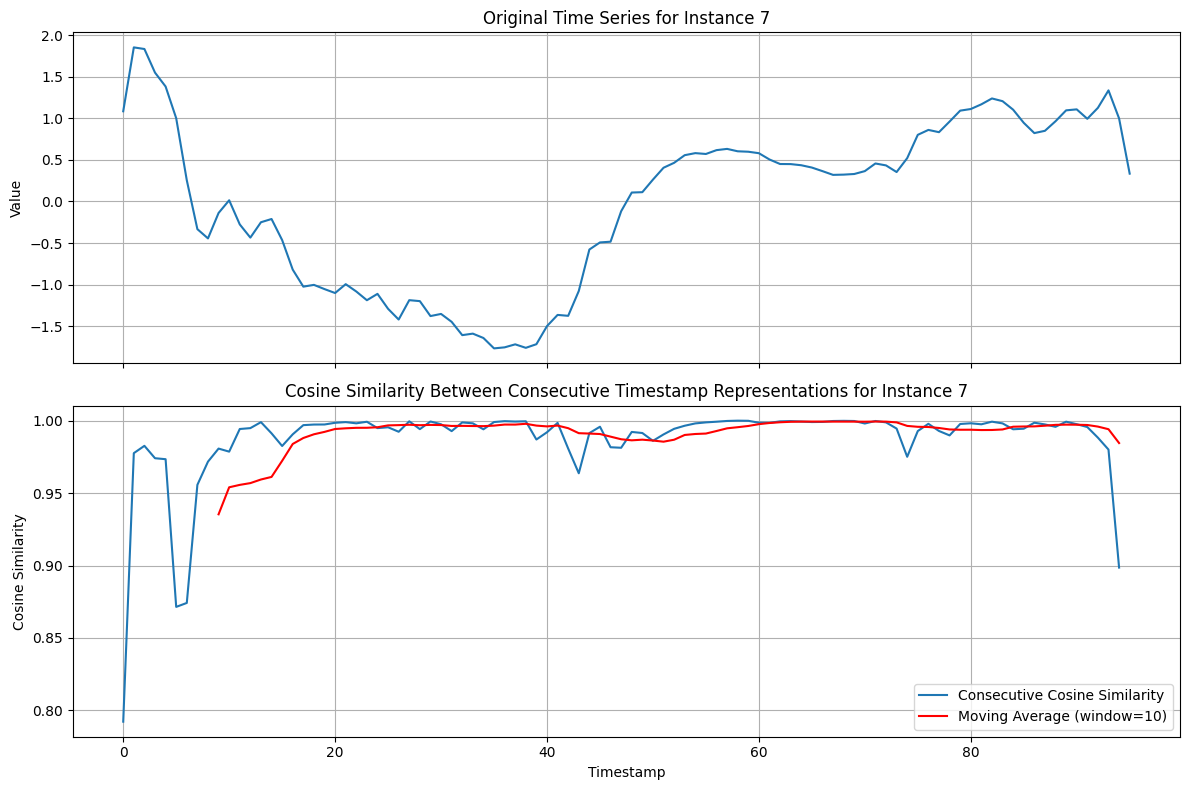

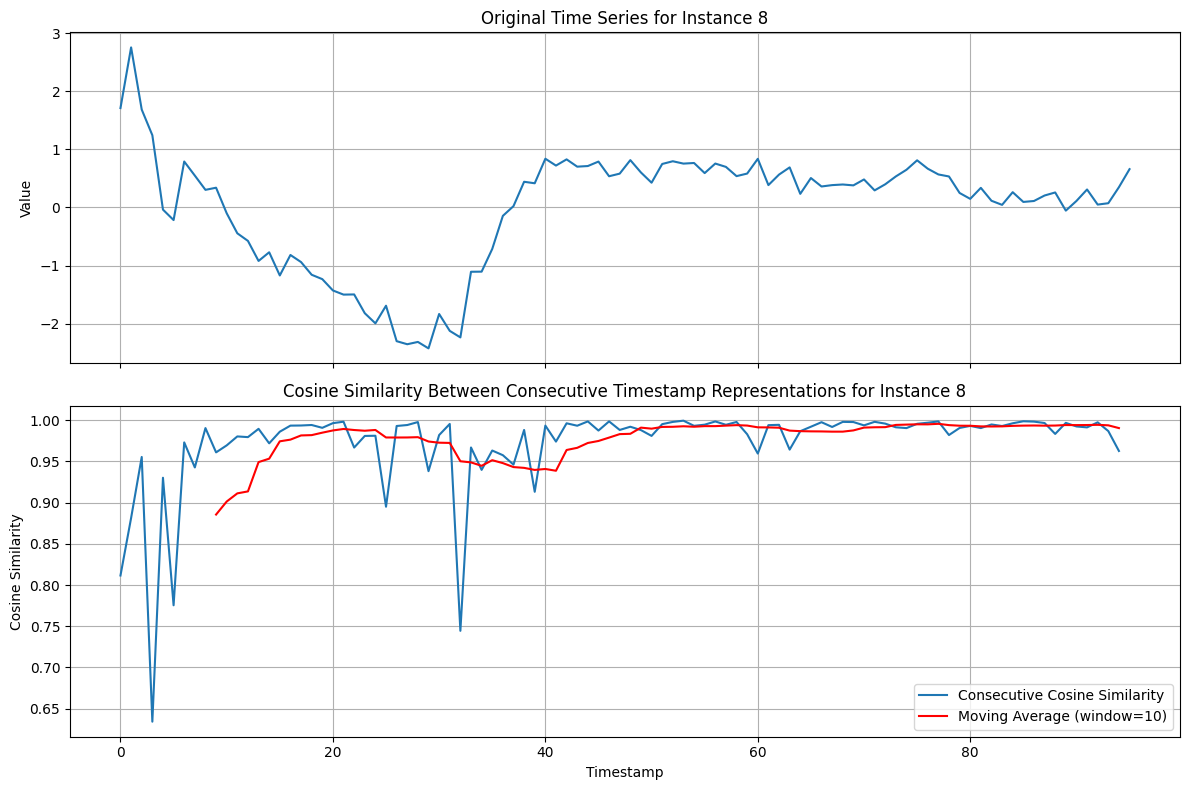

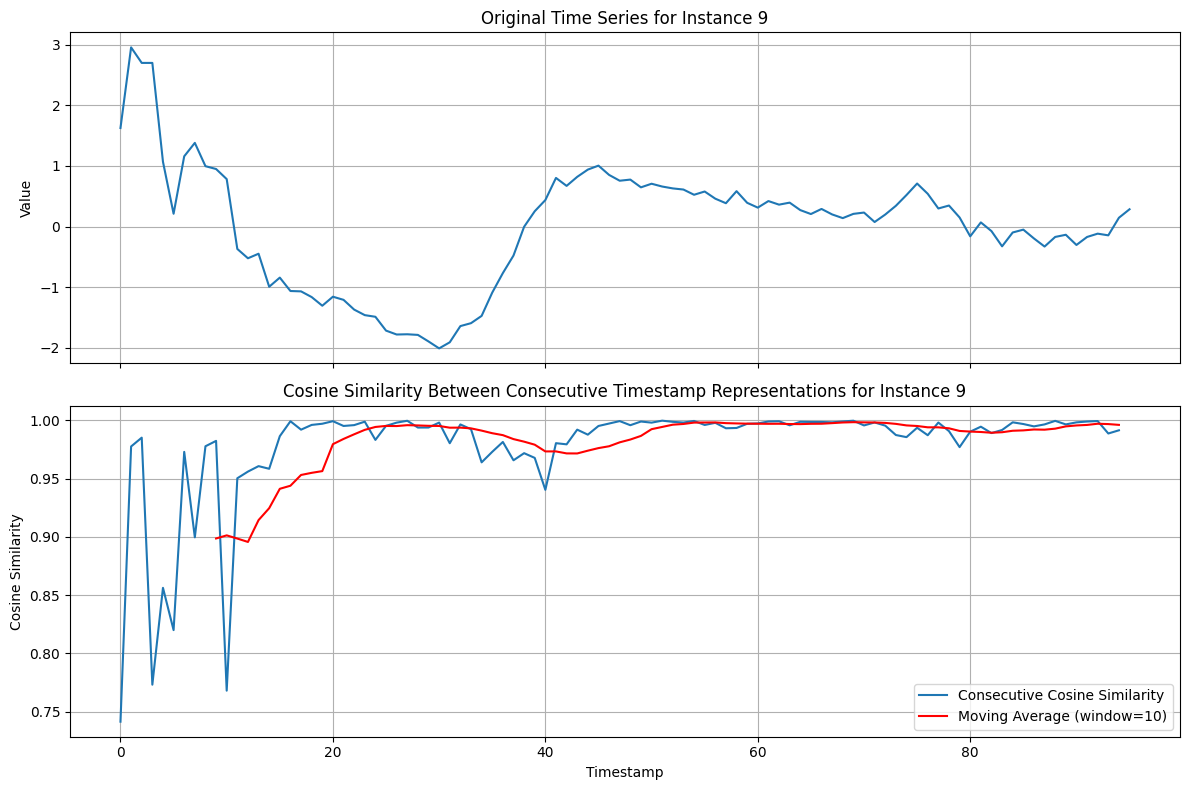

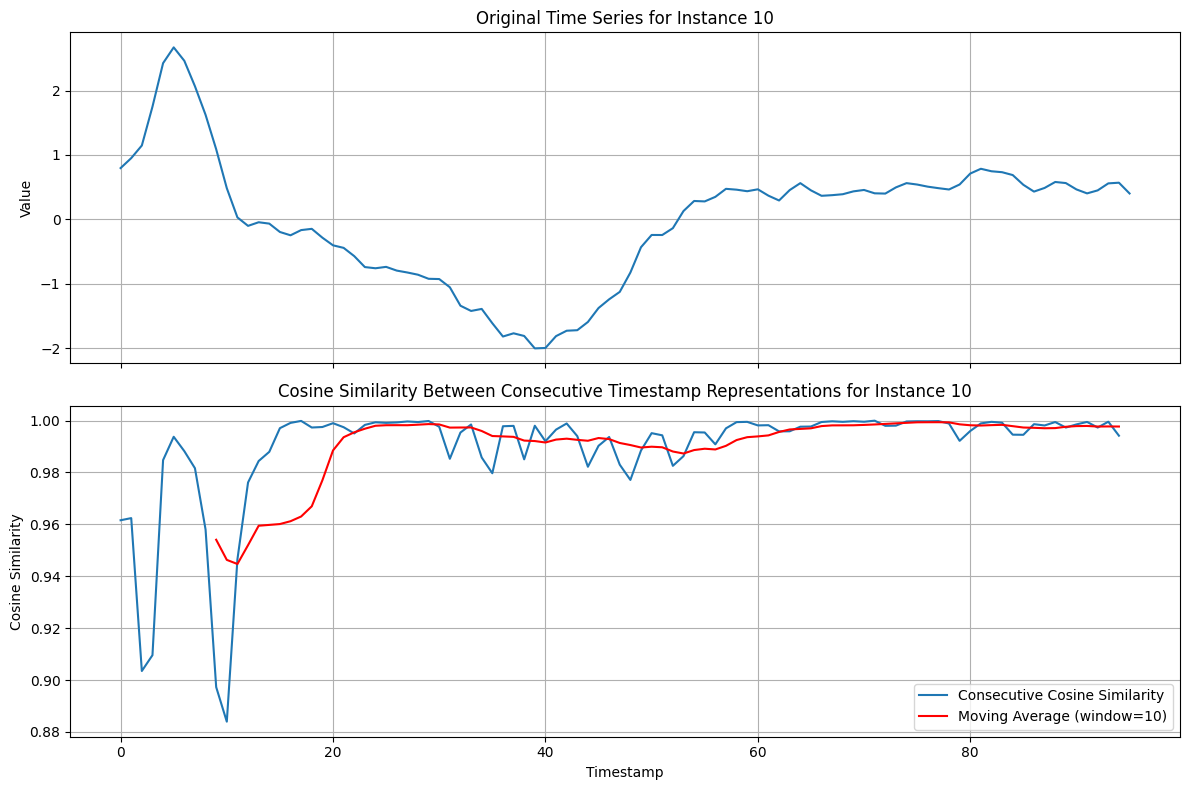

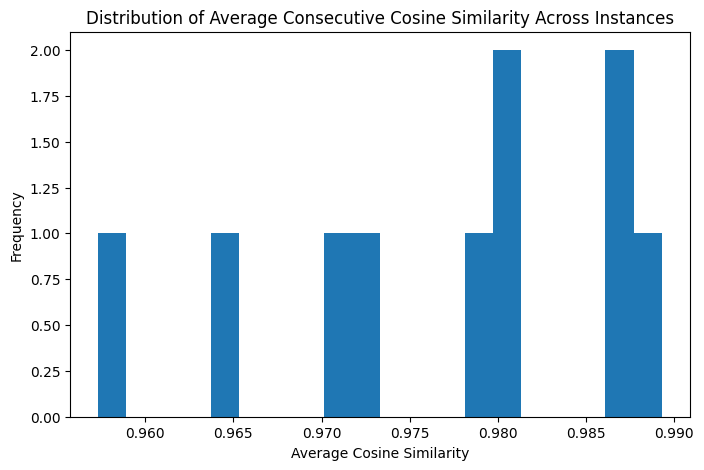

In [13]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Assuming test_repr has shape (n_instances, n_timestamps, output_dims)
# Assuming test_data has shape (n_instances, n_timestamps, n_features)

n_instances, n_timestamps, output_dims = test_repr.shape

# List to store the average cosine similarities for each instance
average_cosine_similarities = []

# Set the number of instances to plot
num_instances_to_plot = 10

# Compute and plot cosine similarity and original time series for selected instances
for i in range(min(n_instances, num_instances_to_plot)):
    # Get the representations for the current instance
    instance_repr = test_repr[i, :, :]
    original_data = test_data[i, :, 0] # Assuming single feature

    # Compute cosine similarity between consecutive timestamps
    # We compare repr[t] with repr[t+1]
    consecutive_similarities = [
        cosine_similarity(instance_repr[t, :].reshape(1, -1), instance_repr[t+1, :].reshape(1, -1))[0, 0]
        for t in range(n_timestamps - 1)
    ]

    # Calculate moving average (you can adjust the window size)
    window_size = 10  # Example window size
    moving_average = np.convolve(consecutive_similarities, np.ones(window_size)/window_size, mode='valid')

    # Create a figure with two subplots stacked vertically, sharing the x-axis
    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Plot the original time series on the top subplot
    axes[0].plot(original_data)
    axes[0].set_title(f'Original Time Series for Instance {i+1}')
    axes[0].set_ylabel('Value')
    axes[0].grid(True)

    # Plot the cosine similarities and moving average on the bottom subplot
    axes[1].plot(consecutive_similarities, label='Consecutive Cosine Similarity')
    axes[1].plot(np.arange(window_size - 1, n_timestamps - 1), moving_average, label=f'Moving Average (window={window_size})', color='red')
    axes[1].set_title(f'Cosine Similarity Between Consecutive Timestamp Representations for Instance {i+1}')
    axes[1].set_xlabel('Timestamp') # x-axis label for the bottom plot
    axes[1].set_ylabel('Cosine Similarity')
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

    # Calculate and store the average cosine similarity for this instance
    average_cosine_similarities.append(np.mean(consecutive_similarities))

# You can also analyze the distribution of average cosine similarities across all instances
plt.figure(figsize=(8, 5))
plt.hist(average_cosine_similarities, bins=20)
plt.title('Distribution of Average Consecutive Cosine Similarity Across Instances')
plt.xlabel('Average Cosine Similarity')
plt.ylabel('Frequency')
plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from ts2vec import TS2Vec # Assuming TS2Vec is importable from your environment

def analyze_ts2vec_representations(train_data, train_labels, test_data, test_labels, input_dims=1, output_dims=320, device=0, num_instances_to_plot=10, sliding_length=1, sliding_padding=6, moving_average_window=10):
    """
    Analyzes TS2Vec representations for a given dataset with optional multiple sliding padding values.

    Args:
        train_data (np.ndarray): Training data (n_instances, n_timestamps, n_features).
        train_labels (np.ndarray): Training labels.
        test_data (np.ndarray): Test data (n_instances, n_timestamps, n_features).
        test_labels (np.ndarray): Test labels.
        input_dims (int): Input dimensions for TS2Vec model.
        output_dims (int): Output dimensions for TS2Vec representations.
        device (int): Device to use for training (0 for GPU, -1 for CPU).
        num_instances_to_plot (int): Number of test instances to plot for each padding value.
        sliding_length (int): Sliding window length for encoding.
        sliding_padding (int or list): Sliding window padding for encoding. Can be a single value or a list of values.
        moving_average_window (int): Window size for moving average of cosine similarity.
    """
    # Ensure sliding_padding is a list for consistent iteration
    if not isinstance(sliding_padding, list):
        sliding_padding_values = [sliding_padding]
    else:
        sliding_padding_values = sliding_padding

    for current_padding in sliding_padding_values:
        print(f"\n--- Analyzing with sliding_padding = {current_padding} ---")

        print("Training TS2Vec model...")
        # Train a TS2Vec model for the current padding (Note: Training might not need to be repeated
        # for each padding if the model is independent of padding for encoding.
        # However, given the request to "try them all out", we'll retrain for clarity
        # or you can uncomment the line below and train once outside the loop if applicable).
        # If the model training is independent of sliding_padding for encoding, you can train
        # the model once before the loop and reuse it.
        model = TS2Vec(
            input_dims=input_dims,
            device=device,
            output_dims=output_dims
        )
        loss_log = model.fit(
            train_data,
            verbose=False # Set to True if you want to see training progress for each padding
        )
        print("TS2Vec model training complete.")

        print("Generating sliding window representations for test data...")
        # Sliding inference for test set with the current padding
        test_repr = model.encode(
            test_data,
            causal=True,
            sliding_length=sliding_length,
            sliding_padding=current_padding
        )
        print(f'Shape of test_repr: {test_repr.shape}')
        print("Representation generation complete.")

        n_instances, n_timestamps, _ = test_repr.shape

        print(f"Computing and plotting cosine similarity for the first {min(n_instances, num_instances_to_plot)} instances with sliding_padding = {current_padding}...")
        # List to store the average cosine similarities for each instance for this padding
        average_cosine_similarities = []

        # Compute and plot cosine similarity and original time series for selected instances
        for i in range(min(n_instances, num_instances_to_plot)):
            # Get the representations for the current instance
            instance_repr = test_repr[i, :, :]
            original_data = test_data[i, :, 0] # Assuming single feature

            # Compute cosine similarity between consecutive timestamps
            consecutive_similarities = [
                cosine_similarity(instance_repr[t, :].reshape(1, -1), instance_repr[t+1, :].reshape(1, -1))[0, 0]
                for t in range(n_timestamps - 1)
            ]

            # Calculate moving average
            moving_average = np.convolve(consecutive_similarities, np.ones(moving_average_window)/moving_average_window, mode='valid')

            # Create a figure with two subplots stacked vertically, sharing the x-axis
            fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

            # Plot the original time series on the top subplot
            axes[0].plot(original_data)
            axes[0].set_title(f'Original Time Series for Instance {i+1} (Label: {test_labels[i]}) - Padding: {current_padding}')
            axes[0].set_ylabel('Value')
            axes[0].grid(True)

            # Plot the cosine similarities and moving average on the bottom subplot
            axes[1].plot(consecutive_similarities, label='Consecutive Cosine Similarity')
            axes[1].plot(np.arange(moving_average_window - 1, n_timestamps - 1), moving_average, label=f'Moving Average (window={moving_average_window})', color='red')
            axes[1].set_title(f'Cosine Similarity Between Consecutive Timestamp Representations - Padding: {current_padding}')
            axes[1].set_xlabel('Timestamp')
            axes[1].set_ylabel('Cosine Similarity')
            axes[1].legend()
            axes[1].grid(True)

            plt.tight_layout()
            plt.show()

            # Calculate and store the average cosine similarity for this instance
            average_cosine_similarities.append(np.mean(consecutive_similarities))

        # Plot the distribution of average cosine similarities across all plotted instances for this padding
        if average_cosine_similarities:
            plt.figure(figsize=(8, 5))
            plt.hist(average_cosine_similarities, bins=20)
            plt.title(f'Distribution of Average Consecutive Cosine Similarity Across Plotted Instances - Padding: {current_padding}')
            plt.xlabel('Average Cosine Similarity')
            plt.ylabel('Frequency')
            plt.show()


--- Analyzing with sliding_padding = 5 ---
Training TS2Vec model...
TS2Vec model training complete.
Generating sliding window representations for test data...
Shape of test_repr: (100, 96, 320)
Representation generation complete.
Computing and plotting cosine similarity for the first 2 instances with sliding_padding = 5...


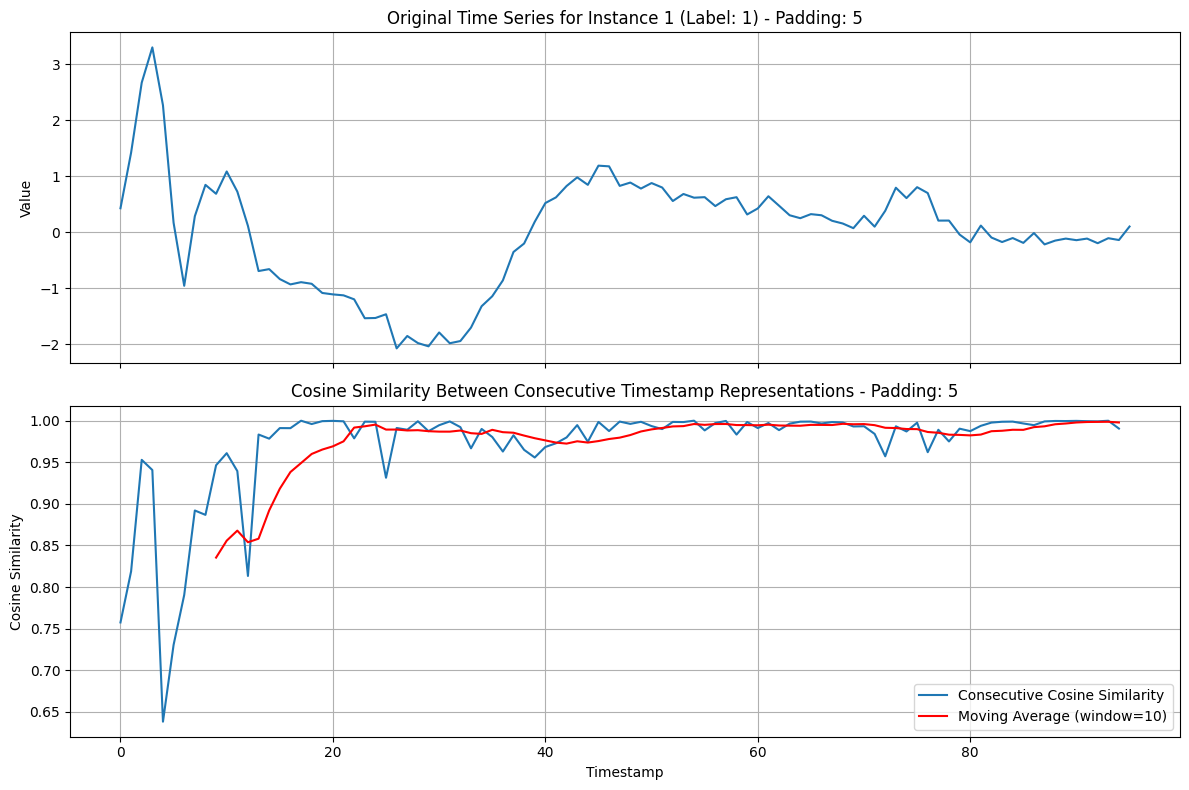

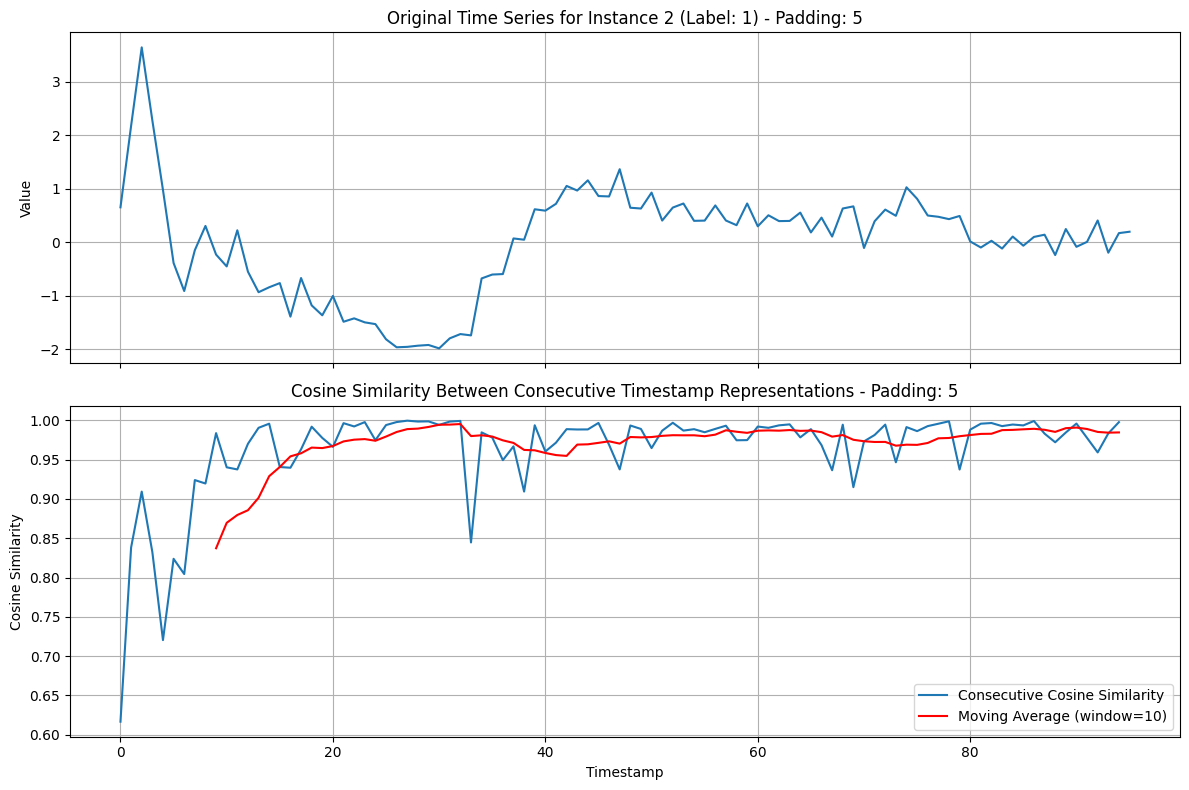

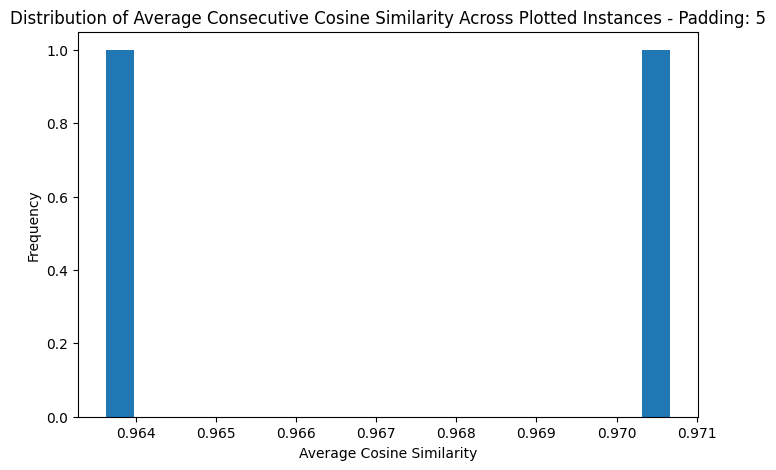


--- Analyzing with sliding_padding = 10 ---
Training TS2Vec model...
TS2Vec model training complete.
Generating sliding window representations for test data...
Shape of test_repr: (100, 96, 320)
Representation generation complete.
Computing and plotting cosine similarity for the first 2 instances with sliding_padding = 10...


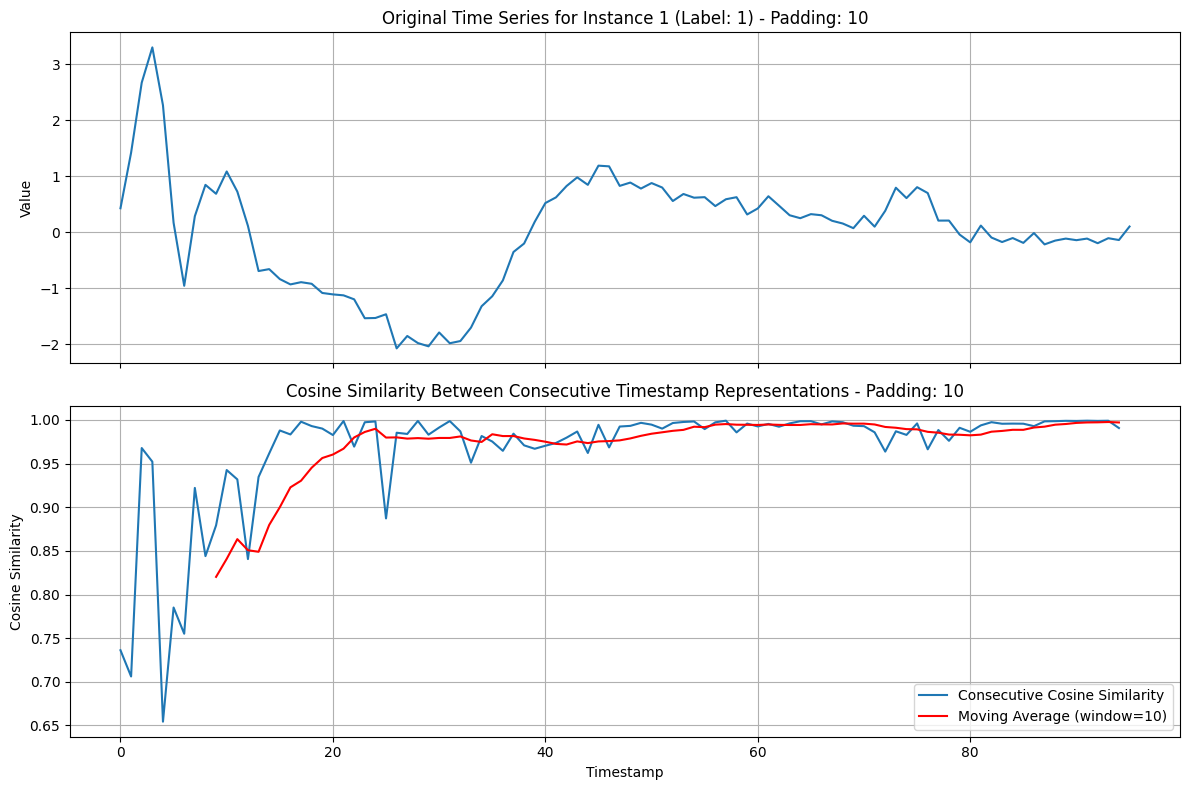

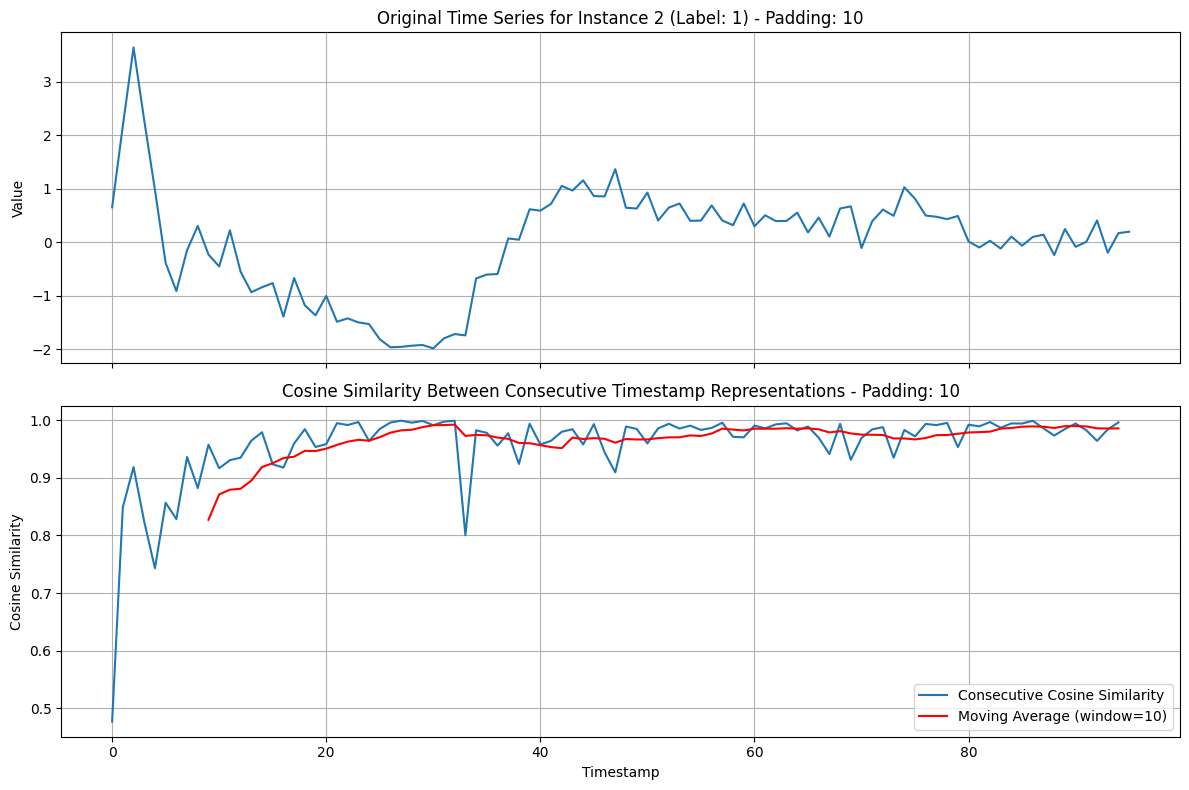

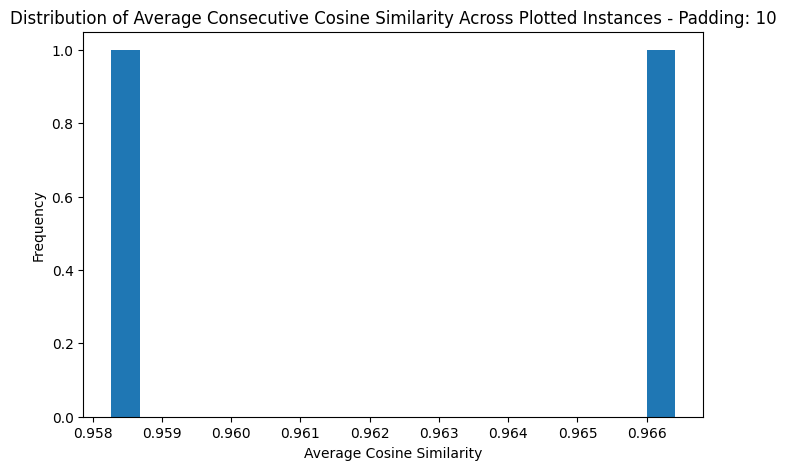


--- Analyzing with sliding_padding = 20 ---
Training TS2Vec model...
TS2Vec model training complete.
Generating sliding window representations for test data...
Shape of test_repr: (100, 96, 320)
Representation generation complete.
Computing and plotting cosine similarity for the first 2 instances with sliding_padding = 20...


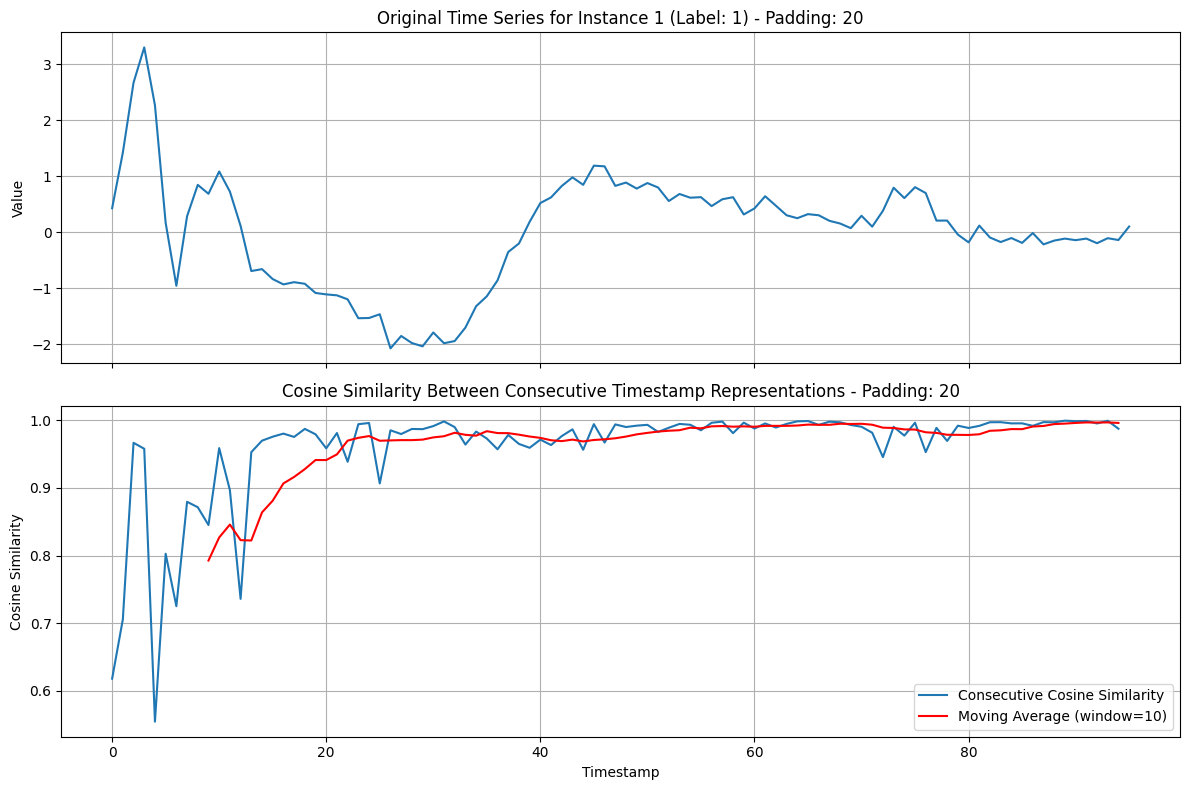

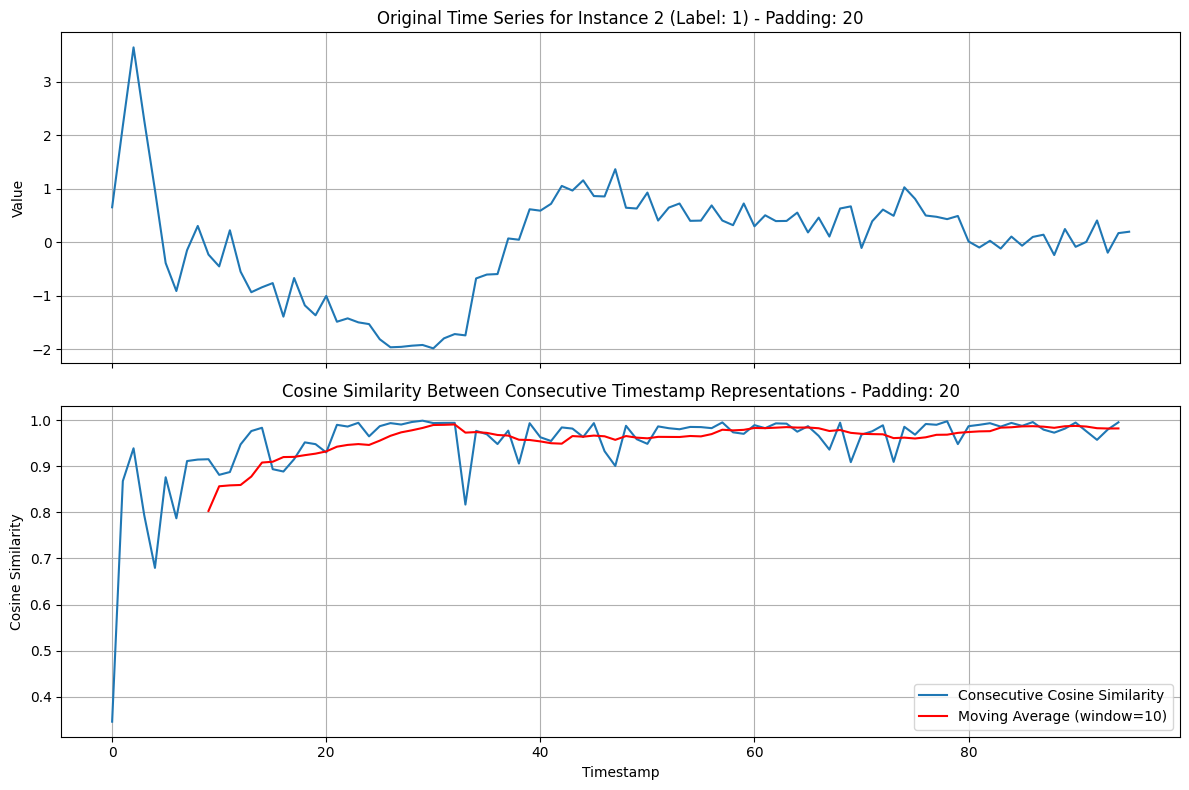

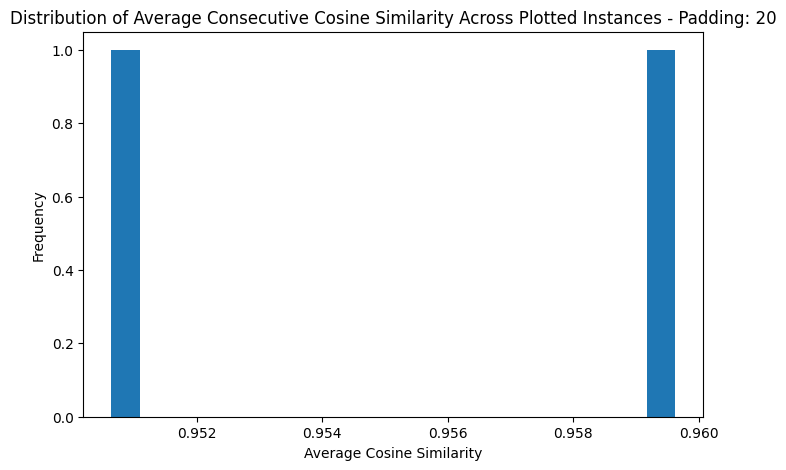

In [19]:
# Example usage of the function (assuming train_data, train_labels, test_data, test_labels are loaded)
analyze_ts2vec_representations(train_data, train_labels, test_data, test_labels, num_instances_to_plot=2, sliding_length=1, sliding_padding=[5, 10, 20], moving_average_window=10)